In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean.cm as cm
import datetime as dt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
import pickle
import os
from salishsea_tools import viz_tools, geo_tools
import arrow
import copy
import math
import matplotlib.dates as mdates

In [2]:
mycmap = copy.copy(cm.oxy)
mycmap.set_bad('darkgreen')

In [3]:

lonSI1 = -123.58
lonSI2 = -123.44
latSI1 = 48.5
latSI2 = 48.695

In [4]:
dfo_ctd2018 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20180101_20181231.csv')
df_obsFeb = dfo_ctd2018[dfo_ctd2018['dtUTC'].between('2018-02-01', '2018-02-10') &  dfo_ctd2018['Lon'].between(lonSI1, lonSI2) & dfo_ctd2018['Lat'].between(latSI1, latSI2) ]
df_obsFeb.head()

,Unnamed: 0,cid,Lon,Lat,dtUTC,Z,SA,CT,Oxygen_Dissolved,name,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_flagellates,mod_vosaline,mod_votemper,mod_dissolved_oxygen,k
486,486,48.0,-123.51317,48.654667,2018-02-02 23:17:00,2.0,28.138622,8.259494,246.50766,NaN,...,206,23.087065,46.630917,1.053656,0.392367,0.245159,27.434219,7.654021,235.326660,1
487,487,48.0,-123.51317,48.654667,2018-02-02 23:17:00,2.9,28.610652,8.309667,237.12965,NaN,...,206,23.869104,46.645359,0.965537,0.356864,0.218078,28.287169,7.871275,232.109299,2
488,488,48.0,-123.51317,48.654667,2018-02-02 23:17:00,4.0,29.009721,8.354363,229.53793,NaN,...,206,23.966646,46.646954,0.954844,0.352471,0.215080,28.400658,7.894593,231.421570,3
489,489,48.0,-123.51317,48.654667,2018-02-02 23:17:00,5.0,29.251136,8.504245,223.73251,NaN,...,206,24.233208,46.626675,0.923841,0.327271,0.207130,28.730965,7.964489,229.454773,4
490,490,48.0,-123.51317,48.654667,2018-02-02 23:17:00,6.0,29.461901,8.560527,217.92706,NaN,...,206,24.310789,46.627945,0.913591,0.325181,0.205251,28.831722,7.979596,229.075058,5


In [5]:
print((df_obsFeb.j[486],df_obsFeb.i[486]))

(355, 206)


In [20]:
df_gridFeb = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/202111b/02feb18/SalishSea_1h_20180202_20180202_grid_T.nc')
df_chemFeb = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/202111b/02feb18/SalishSea_1h_20180202_20180202_chem_T.nc')
sal_Feb = df_gridFeb.vosaline.sel(time_counter='2018-02-02 23:30:00', y=355, x=206)
oxy_Feb = df_chemFeb.dissolved_oxygen.sel(time_counter='2018-02-02 23:30:00', y=355, x=206)

In [ ]:
df_obsApr = dfo_ctd2018[dfo_ctd2018['dtUTC'].between('2018-04-07', '2018-04-08') &  dfo_ctd2018['Lon'].between(lonSI1, lonSI2) & dfo_ctd2018['Lat'].between(latSI1, latSI2) ]
df_obsApr.head()

,Unnamed: 0,cid,Lon,Lat,dtUTC,Z,SA,CT,Oxygen_Dissolved,name,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_flagellates,mod_vosaline,mod_votemper,mod_dissolved_oxygen,k
26244,26244,372.0,-123.510666,48.65333,2018-04-07 01:41:00,1.9,28.715804,8.862192,474.25930,NaN,...,206,4.004545,5.164987,0.767086,6.633062,0.313434,28.007221,9.034862,377.055359,1
26245,26245,372.0,-123.510666,48.65333,2018-04-07 01:41:00,3.0,29.047950,8.696910,446.57187,NaN,...,206,5.501622,8.587341,1.021819,6.562703,0.278218,28.303654,8.589983,363.564728,2
26246,26246,372.0,-123.510666,48.65333,2018-04-07 01:41:00,4.0,29.449535,8.491014,372.44095,NaN,...,206,8.494486,14.594169,1.458904,5.194815,0.231523,28.570398,8.555515,338.951019,3
26247,26247,372.0,-123.510666,48.65333,2018-04-07 01:41:00,5.0,29.582327,8.478401,348.77260,NaN,...,206,11.534586,20.621023,1.888078,3.758048,0.195796,28.744909,8.422237,313.467926,4
26248,26248,372.0,-123.510666,48.65333,2018-04-07 01:41:00,6.0,29.661259,8.594588,347.87946,NaN,...,206,13.480537,24.570307,2.150691,2.730075,0.174301,28.861557,8.366032,297.602234,5


In [ ]:
print((df_obsApr.j[26244],df_obsApr.i[26244]))

(355, 206)


In [22]:
df_gridApr = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/202111b/07apr18/SalishSea_1h_20180407_20180407_grid_T.nc')
df_chemApr = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/202111b/07apr18/SalishSea_1h_20180407_20180407_chem_T.nc')
oxy_Apr = df_chemApr.dissolved_oxygen.sel(time_counter='2018-04-07 1:30:00', y=355, x=206)
sal_Apr = df_gridApr.vosaline.sel(time_counter='2018-04-07 1:30:00', y=355, x=206)

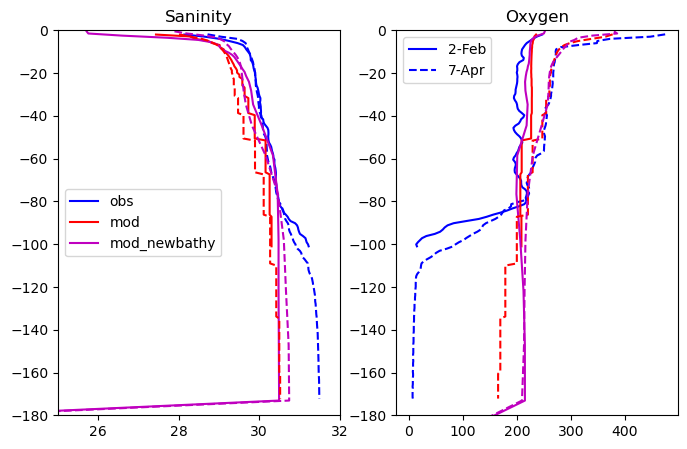

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (8, 5)) 

ax[0].plot(df_obsFeb.SA,-df_obsFeb.Z,'b',label='obs')
ax[0].plot(df_obsApr.SA,-df_obsApr.Z,'b--')
ax[0].plot(df_obsFeb.mod_vosaline,-df_obsFeb.Z,'r',label='mod')
ax[0].plot(sal_Feb,-sal_Feb.deptht,'m',label='mod_newbathy')
ax[0].set_title('Saninity')

ax[0].plot(df_obsApr.mod_vosaline,-df_obsApr.Z,'r--')
ax[0].plot(sal_Apr,-sal_Apr.deptht,'m--')
ax[0].set_ylim([-180, 0])
ax[0].set_xlim([25, 32])
ax[0].legend()

ax[1].plot(df_obsFeb.Oxygen_Dissolved,-df_obsFeb.Z,'b',label='2-Feb')
ax[1].plot(df_obsApr.Oxygen_Dissolved,-df_obsApr.Z,'b--',label='7-Apr')
ax[1].plot(df_obsFeb.mod_dissolved_oxygen,-df_obsFeb.Z,'r')
ax[1].plot(oxy_Feb,-oxy_Feb.deptht,'m')
ax[1].plot(df_obsApr.mod_dissolved_oxygen,-df_obsApr.Z,'r--')
ax[1].plot(oxy_Apr,-oxy_Apr.deptht,'m--')
ax[1].set_ylim([-180, 0])
ax[1].set_title('Oxygen')
ax[1].legend()

In [ ]:
df_obsTS = dfo_ctd2018[dfo_ctd2018['dtUTC'].between('2018-01-01', '2018-12-31') &  dfo_ctd2018['Lon'].between(-123.515, -123.5100) & dfo_ctd2018['Lat'].between(48.6500, 48.655) ]
df_obsTS

,Unnamed: 0,cid,Lon,Lat,dtUTC,Z,SA,CT,Oxygen_Dissolved,name,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_flagellates,mod_vosaline,mod_votemper,mod_dissolved_oxygen,k
486,486,48.0,-123.513170,48.654667,2018-02-02 23:17:00,2.0,28.138622,8.259494,246.507660,NaN,...,206,23.087065,46.630917,1.053656,0.392367,0.245159,27.434219,7.654021,235.326660,1
487,487,48.0,-123.513170,48.654667,2018-02-02 23:17:00,2.9,28.610652,8.309667,237.129650,NaN,...,206,23.869104,46.645359,0.965537,0.356864,0.218078,28.287169,7.871275,232.109299,2
488,488,48.0,-123.513170,48.654667,2018-02-02 23:17:00,4.0,29.009721,8.354363,229.537930,NaN,...,206,23.966646,46.646954,0.954844,0.352471,0.215080,28.400658,7.894593,231.421570,3
489,489,48.0,-123.513170,48.654667,2018-02-02 23:17:00,5.0,29.251136,8.504245,223.732510,NaN,...,206,24.233208,46.626675,0.923841,0.327271,0.207130,28.730965,7.964489,229.454773,4
490,490,48.0,-123.513170,48.654667,2018-02-02 23:17:00,6.0,29.461901,8.560527,217.927060,NaN,...,206,24.310789,46.627945,0.913591,0.325181,0.205251,28.831722,7.979596,229.075058,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26412,26412,372.0,-123.510666,48.653330,2018-04-07 01:41:00,168.5,31.488180,9.644277,6.698578,NaN,...,206,27.262276,62.458321,0.963907,0.044374,0.011711,30.518335,9.155709,164.998230,29
26413,26413,372.0,-123.510666,48.653330,2018-04-07 01:41:00,169.5,31.488803,9.644056,6.698578,NaN,...,206,27.262276,62.458321,0.963907,0.044374,0.011711,30.518335,9.155709,164.998230,29
26414,26414,372.0,-123.510666,48.653330,2018-04-07 01:41:00,170.5,31.489826,9.643727,6.698578,NaN,...,206,27.262276,62.458321,0.963907,0.044374,0.011711,30.518335,9.155709,164.998230,29
26415,26415,372.0,-123.510666,48.653330,2018-04-07 01:41:00,171.5,31.491152,9.643393,6.698578,NaN,...,206,27.262276,62.458321,0.963907,0.044374,0.011711,30.518335,9.155709,164.998230,29


In [7]:
grid = xr.open_dataset('/ocean/atall/MOAD/grid/grid_from_lat_lon_mask999.nc')
with xr.open_dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/mesh_mask_202310b.nc') as mesh:
    tmask = mesh.tmask
    mbathy = mesh.mbathy
    long = mesh.nav_lon
    latg = mesh.nav_lat
mesh

<xarray.Dataset>
Dimensions:       (y: 898, x: 398, z: 40, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/44)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  31/10/2023 18:41:52 -0400

In [8]:
with xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/202111b/01jan18/SalishSea_1d_20180101_20180101_chem_T.nc') as data_chem:
    oxy_ = data_chem['dissolved_oxygen']
with xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/202111b/01jan18/SalishSea_1d_20180101_20180101_biol_T.nc') as data_biol:
    no3_ = data_biol['nitrate']
    don_ = data_biol['dissolved_organic_nitrogen']
    pon_ = data_biol['particulate_organic_nitrogen']
    dia_ = data_biol['diatoms']
    fla_ = data_biol['flagellates']
with xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/202111b/01jan18/SalishSea_1d_20180101_20180101_grid_T.nc') as data_grid:
    temp_ = data_grid['votemper']
    salt_ = data_grid['vosaline']

In [9]:
tmask2_oxy = tmask.assign_coords(z=("z", oxy_.deptht.data))
tmask2_oxy = tmask2_oxy.rename({"z": "deptht"})
tmask2_no3 = tmask.assign_coords(z=("z", no3_.deptht.data))
tmask2_no3 = tmask2_no3.rename({"z": "deptht"})
tmask2_dia = tmask.assign_coords(z=("z", dia_.deptht.data))
tmask2_dia = tmask2_dia.rename({"z": "deptht"})
tmask2_fla = tmask.assign_coords(z=("z", fla_.deptht.data))
tmask2_fla = tmask2_fla.rename({"z": "deptht"})
tmask2_temp = tmask.assign_coords(z=("z", temp_.deptht.data))
tmask2_temp = tmask2_temp.rename({"z": "deptht"})
tmask2_salt = tmask.assign_coords(z=("z", salt_.deptht.data))
tmask2_salt = tmask2_salt.rename({"z": "deptht"})

In [10]:
#jstart, jend, istart, iend = (330, 365, 180, 250)
jstart, jend, istart, iend = (354, 356, 205, 207)

In [11]:
# Constant and data rang
jstart, jend, istart, iend = (354, 356, 205, 207)
syear = 2018
eyear = 2018
smonth = 1
emonth = 9
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 30)
print (startdate, enddate)

2018-01-01T00:00:00+00:00 2018-09-30T00:00:00+00:00


In [12]:

first = True
for ii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
    year = day.year
    yr2 = day.strftime("%y")
    month = day.month
    Month = day.strftime("%b").lower()
    day = day.day
    # set up filename to follow NEMO conventions
    filename_grid = f'/data/atall/MEOPAR/SalishSeaCast/results/202111b/{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_grid_T.nc'
    with xr.open_dataset(filename_grid) as ds_grid:
        sal = ds_grid['vosaline'][0, :, jstart:jend, istart:iend].where(tmask2_salt[0, :, jstart:jend, istart:iend] == 1)
        tem = ds_grid['votemper'][0, :, jstart:jend, istart:iend].where(tmask2_salt[0, :, jstart:jend, istart:iend] == 1)
        if first:
            first = False
            sal_ts = sal
            tem_ts = tem
        else:
            sal_ts = xr.concat([sal_ts, sal], dim='time_counter')
            tem_ts = xr.concat([tem_ts, tem], dim='time_counter')

In [13]:

first = True
for ii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
    year = day.year
    yr2 = day.strftime("%y")
    month = day.month
    Month = day.strftime("%b").lower()
    day = day.day
    # set up filename to follow NEMO conventions
    filename_chem = f'/data/atall/MEOPAR/SalishSeaCast/results/202111b/{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_chem_T.nc'
    with xr.open_dataset(filename_chem) as ds_chem:
        oxy = ds_chem['dissolved_oxygen'][0, :, jstart:jend, istart:iend].where(tmask2_oxy[0, :, jstart:jend, istart:iend] == 1)
        dic = ds_chem['dissolved_inorganic_carbon'][0, :, jstart:jend, istart:iend].where(tmask2_oxy[0, :, jstart:jend, istart:iend] == 1)
        if first:
            first = False
            oxy_ts = oxy
            dic_ts = dic
        else:
            oxy_ts = xr.concat([oxy_ts, oxy], dim='time_counter')
            dic_ts = xr.concat([dic_ts, dic], dim='time_counter')

In [14]:
sal_ts.shape

(273, 40, 2, 2)

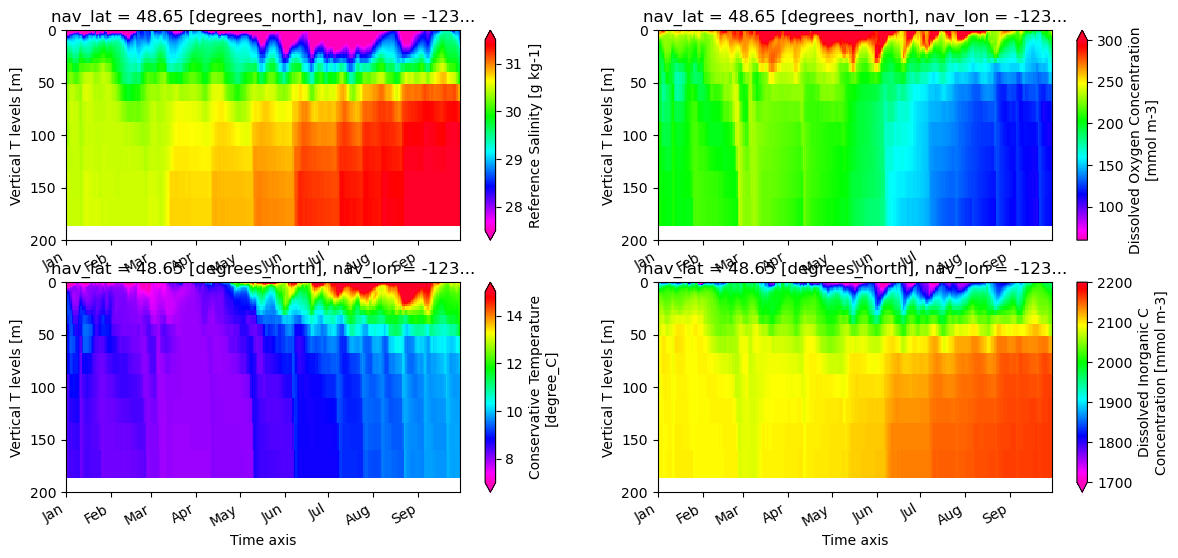

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(14, 6))
oxy_ts[:,:,1,1].plot(ax=ax[0,1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=60, vmax=300, ylim=(200, 0), xlim=(startdate, enddate));
dic_ts[:,:,1,1].plot(ax=ax[1,1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=1700, vmax=2200, ylim=(200, 0), xlim=(startdate, enddate));
sal_ts[:,:,1,1].plot(ax=ax[0,0], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=27.5, vmax=31.5, ylim=(200, 0), xlim=(startdate, enddate));
tem_ts[:,:,1,1].plot(ax=ax[1,0], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=7, vmax=15, ylim=(200, 0), xlim=(startdate, enddate));

ax[0,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))